/tmp/ipykernel_19455/316702358.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_target['modelo'] = pd.Categorical(
/tmp/ipykernel_19455/316702358.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_target['modelo'] = pd.Categorical(
/tmp/ipykernel_19455/316702358.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

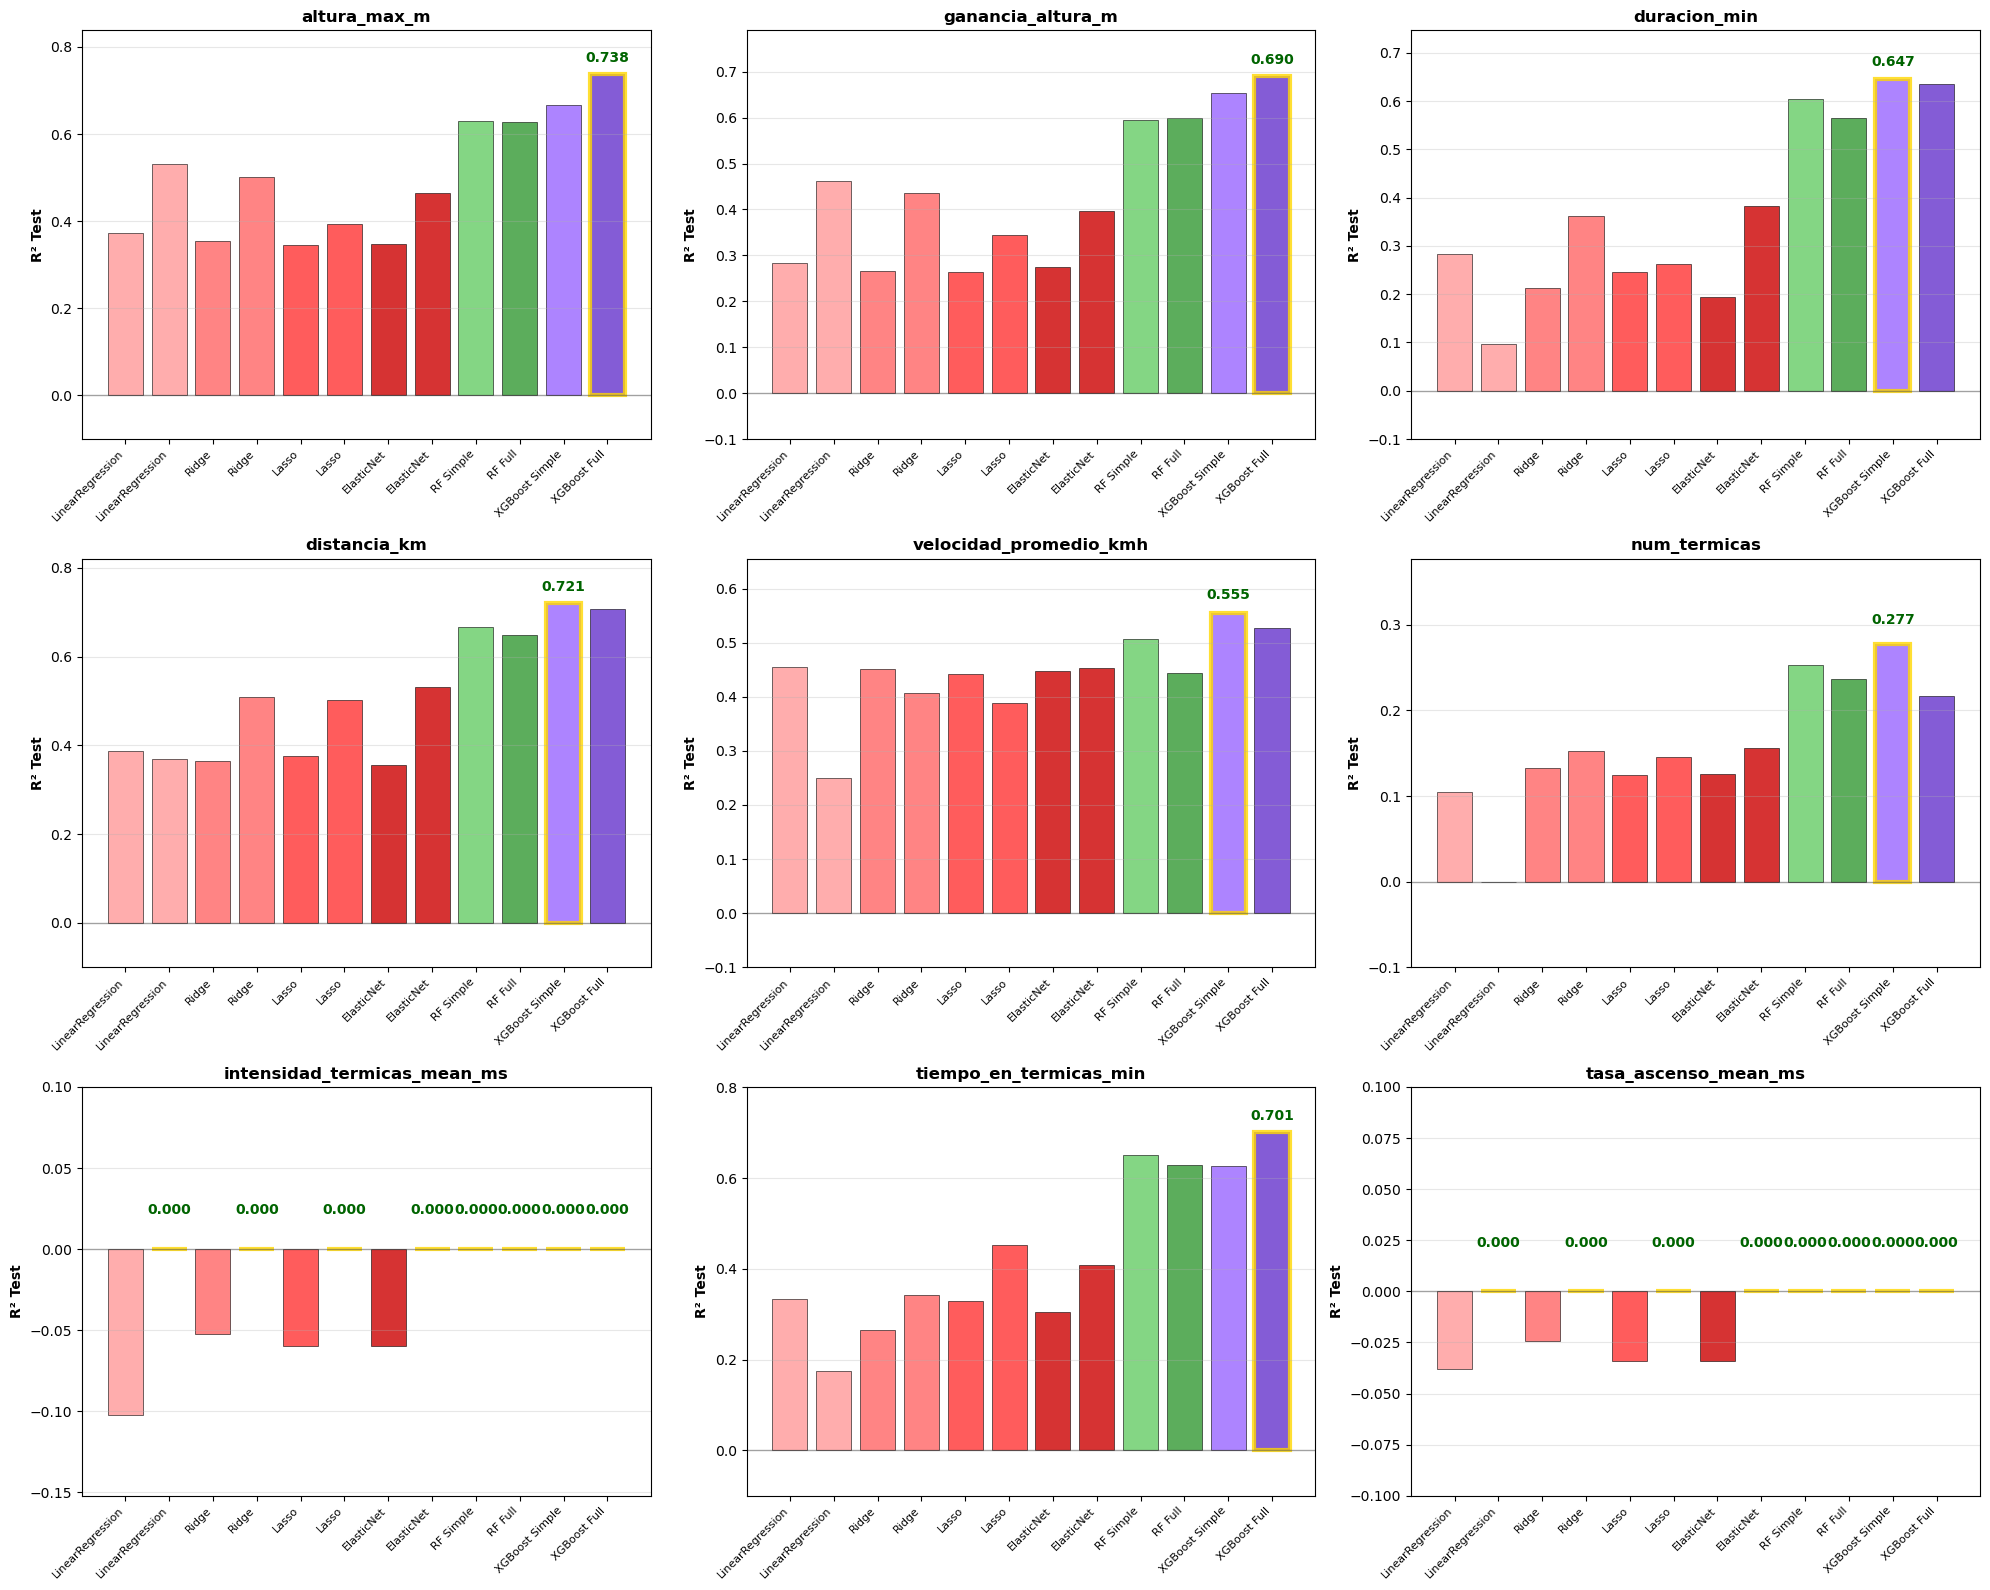

COMPARACIÓN COMPLETA - TODOS LOS MODELOS

TABLA DE RESULTADOS (R² Test):
modelo                       DummyRegressor  LinearRegression     Ridge     Lasso  ElasticNet  RF Simple   RF Full  XGBoost Simple  XGBoost Full
target                                                                                                                                          
altura_max_m                            NaN          0.451690  0.427446  0.369605    0.406662   0.629422  0.627493        0.667131      0.738253
ganancia_altura_m                       NaN          0.372869  0.350925  0.304771    0.336167   0.594033  0.598851        0.652646      0.690102
duracion_min                            NaN          0.189214  0.288170  0.254521    0.288985   0.604562  0.564768        0.646732      0.636295
distancia_km                            NaN          0.378515  0.437897  0.438921    0.443199   0.667787  0.648502        0.720751      0.707848
velocidad_promedio_kmh                  NaN          0.35

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# COMPARACIÓN COMPLETA: TODOS LOS MODELOS
# ============================================================================

# Cargar resultados
df_baseline = pd.read_csv('../data/processed/baseline_completo.csv')
df_rf_simple = pd.read_csv('../data/processed/rf_simple.csv')
df_rf_full = pd.read_csv('../data/processed/rf_full.csv')
df_xgb_simple = pd.read_csv('../data/processed/xgb_simple.csv')
df_xgb_full = pd.read_csv('../data/processed/xgb_full.csv')

# Targets
targets_reg = [
    'altura_max_m', 'ganancia_altura_m', 'duracion_min',
    'distancia_km', 'velocidad_promedio_kmh', 'num_termicas',
    'intensidad_termicas_mean_ms', 'tiempo_en_termicas_min',
    'tasa_ascenso_mean_ms'
]

# Preparar datos para cada modelo
resultados_comparacion = []

for target in targets_reg:
    # Baseline - separar por modelo
    baseline_target = df_baseline[df_baseline['target'] == target]
    
    for _, row in baseline_target.iterrows():
        resultados_comparacion.append({
            'target': target,
            'modelo': row['modelo'],
            'Test_R2': row['Test_R2']
        })
    
    # Random Forest Simple
    rf_simple_r2 = df_rf_simple[df_rf_simple['target'] == target]['Test_R2'].values[0]
    resultados_comparacion.append({
        'target': target,
        'modelo': 'RF Simple',
        'Test_R2': rf_simple_r2
    })
    
    # Random Forest Full
    rf_full_r2 = df_rf_full[df_rf_full['target'] == target]['Test_R2'].values[0]
    resultados_comparacion.append({
        'target': target,
        'modelo': 'RF Full',
        'Test_R2': rf_full_r2
    })
    
    # XGBoost Simple
    xgb_simple_r2 = df_xgb_simple[df_xgb_simple['target'] == target]['Test_R2'].values[0]
    resultados_comparacion.append({
        'target': target,
        'modelo': 'XGBoost Simple',
        'Test_R2': xgb_simple_r2
    })
    
    # XGBoost Full
    xgb_full_r2 = df_xgb_full[df_xgb_full['target'] == target]['Test_R2'].values[0]
    resultados_comparacion.append({
        'target': target,
        'modelo': 'XGBoost Full',
        'Test_R2': xgb_full_r2
    })

df_comparacion_completa = pd.DataFrame(resultados_comparacion)

# ============================================================================
# GRÁFICO COMPLETO
# ============================================================================

fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.flatten()

# Orden de modelos (de más simple a más complejo)
orden_modelos = [
    'DummyRegressor',
    'LinearRegression', 
    'Ridge', 
    'Lasso', 
    'ElasticNet',
    'RF Simple',
    'RF Full',
    'XGBoost Simple',
    'XGBoost Full'
]

# Colores por modelo
colores = {
    'DummyRegressor': '#cccccc',
    'LinearRegression': '#ff9999',
    'Ridge': '#ff6666',
    'Lasso': '#ff3333',
    'ElasticNet': '#cc0000',
    'RF Simple': '#66cc66',
    'RF Full': '#339933',
    'XGBoost Simple': '#9966ff',
    'XGBoost Full': '#6633cc'
}

for idx, target in enumerate(targets_reg):
    ax = axes[idx]
    
    # Filtrar datos del target
    datos_target = df_comparacion_completa[df_comparacion_completa['target'] == target]
    
    # Ordenar por modelo
    datos_target['modelo'] = pd.Categorical(
        datos_target['modelo'], 
        categories=orden_modelos, 
        ordered=True
    )
    datos_target = datos_target.sort_values('modelo')
    
    # Encontrar máximo
    max_r2 = datos_target['Test_R2'].max()
    
    # Crear barras
    bars = ax.bar(
        range(len(datos_target)),
        datos_target['Test_R2'],
        color=[colores[m] for m in datos_target['modelo']],
        alpha=0.8,
        edgecolor='black',
        linewidth=0.5
    )
    
    # Marcar el máximo con su valor
    for i, (bar, valor) in enumerate(zip(bars, datos_target['Test_R2'])):
        if valor == max_r2:
            # Barra del máximo con borde grueso
            bar.set_edgecolor('gold')
            bar.set_linewidth(3)
            
            # Texto con el valor
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_height() + 0.02,
                f'{valor:.3f}',
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='bold',
                color='darkgreen'
            )
    
    # Configuración del gráfico
    ax.set_title(target, fontsize=12, fontweight='bold')
    ax.set_ylabel('R² Test', fontsize=10, fontweight='bold')
    ax.set_xticks(range(len(datos_target)))
    ax.set_xticklabels(datos_target['modelo'], rotation=45, ha='right', fontsize=8)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.3)
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim([min(-0.1, datos_target['Test_R2'].min() - 0.05), 
                 datos_target['Test_R2'].max() + 0.1])

plt.tight_layout()
plt.savefig('../data/processed/comparacion_completa_todos_modelos.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("="*70)
print("COMPARACIÓN COMPLETA - TODOS LOS MODELOS")
print("="*70)

# ============================================================================
# TABLA RESUMEN
# ============================================================================

# Pivot para tabla
tabla_pivot = df_comparacion_completa.pivot_table(
    index='target',
    columns='modelo',
    values='Test_R2',
    aggfunc='mean'
)

# Ordenar columnas
tabla_pivot = tabla_pivot.reindex(columns=orden_modelos)

# Reordenar filas según targets_reg
tabla_pivot = tabla_pivot.reindex(targets_reg)
tabla_pivot = tabla_pivot.reindex(columns=orden_modelos)

print("\nTABLA DE RESULTADOS (R² Test):")
print(tabla_pivot.to_string())

# ============================================================================
# MEJORES POR TARGET
# ============================================================================

print("\n" + "="*70)
print("MEJOR MODELO POR TARGET:")
print("="*70)

for target in targets_reg:
    datos_target = df_comparacion_completa[df_comparacion_completa['target'] == target]
    mejor = datos_target.loc[datos_target['Test_R2'].idxmax()]
    
    print(f"\n{target}:")
    print(f"  Mejor modelo: {mejor['modelo']}")
    print(f"  R² Test: {mejor['Test_R2']:.4f}")

# ============================================================================
# R² PROMEDIO POR MODELO
# ============================================================================

print("\n" + "="*70)
print("R² PROMEDIO POR MODELO (todos los targets):")
print("="*70)

promedios = df_comparacion_completa.groupby('modelo')['Test_R2'].mean().sort_values(ascending=False)

for modelo, promedio in promedios.items():
    print(f"  {modelo:25s}: {promedio:.4f}")

# ============================================================================
# CONTEO DE GANADORES
# ============================================================================

print("\n" + "="*70)
print("CONTEO: ¿Cuántas veces cada modelo es el mejor?")
print("="*70)

ganadores = []
for target in targets_reg:
    datos_target = df_comparacion_completa[df_comparacion_completa['target'] == target]
    mejor_modelo = datos_target.loc[datos_target['Test_R2'].idxmax(), 'modelo']
    ganadores.append(mejor_modelo)

conteo_ganadores = pd.Series(ganadores).value_counts()
print(conteo_ganadores)

# ============================================================================
# GUARDAR COMPARACIÓN COMPLETA
# ============================================================================

df_comparacion_completa.to_csv('../data/processed/comparacion_completa_todos.csv', index=False)
print("\n✓ Tabla completa guardada en: comparacion_completa_todos.csv")
print("="*70)